## Customer Evaluation of Hospitals across the U.S. 

### Research Question: What are the characteristics of hospitals with high vs. low customer ratings?

Data Source: Medicare.gov (Ratings of Medicare-certified hospitals across the country)

Outcome Variable: Hospital overall rating

Hospital characteristics investigated: Hospital Type, Hospital Ownership, and State



### Importing the python packages and data

In [27]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
df = pd.read_csv ('Hospital_Data.csv')
df.head()

,ProviderID,HospitalName,Address,City,State,ZIPCode,CountyName,PhoneNumber,HospitalType,HospitalOwnership,...,Patientexperiencenationalcomparison,Patientexperiencenationalcomparisonfootnote,Effectivenessofcarenationalcomparison,Effectivenessofcarenationalcomparisonfootnote,Timelinessofcarenationalcomparison,Timelinessofcarenationalcomparisonfootnote,Efficientuseofmedicalimagingnationalcomparison,Efficientuseofmedicalimagingnationalcomparisonfootnote,Location,filter_$
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,...,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN,"2505 U S HIGHWAY 431 NORTH BOAZ, AL",1
1,10012,DEKALB REGIONAL MEDICAL CENTER,200 MED CENTER DRIVE,FORT PAYNE,AL,35968,DE KALB,2568453150,Acute Care Hospitals,Proprietary,...,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN,"200 MED CENTER DRIVE FORT PAYNE, AL",1
2,10095,HALE COUNTY HOSPITAL,508 GREEN STREET,GREENSBORO,AL,36744,HALE,3346243024,Acute Care Hospitals,Government - Hospital District or Authority,...,Not Available,There are too few measures or measure groups r...,Same as the national average,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,"508 GREEN STREET GREENSBORO, AL",1
3,10131,CRESTWOOD MEDICAL CENTER,ONE HOSPITAL DR SE,HUNTSVILLE,AL,35801,MADISON,2568823100,Acute Care Hospitals,Proprietary,...,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,"ONE HOSPITAL DR SE HUNTSVILLE, AL",1
4,20018,YUKON KUSKOKWIM DELTA REG HOSPITAL,PO BOX 287,BETHEL,AK,99559,BETHEL,9075436300,Acute Care Hospitals,Tribal,...,Below the national average,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,Not Available,There are too few measures or measure groups r...,"PO BOX 287 BETHEL, AK",1




### A new dataframe is created with the variables of interest

In [30]:
dfb=pd.DataFrame(df, columns=['ProviderID', 'HospitalName', 'State', 'HospitalType', 'HospitalOwnership', 'Hospitaloverallrating'])
dfb.head()

,ProviderID,HospitalName,State,HospitalType,HospitalOwnership,EmergencyServices,Hospitaloverallrating
0,10005,MARSHALL MEDICAL CENTER SOUTH,AL,Acute Care Hospitals,Government - Hospital District or Authority,1,2
1,10012,DEKALB REGIONAL MEDICAL CENTER,AL,Acute Care Hospitals,Proprietary,1,3
2,10095,HALE COUNTY HOSPITAL,AL,Acute Care Hospitals,Government - Hospital District or Authority,1,3
3,10131,CRESTWOOD MEDICAL CENTER,AL,Acute Care Hospitals,Proprietary,1,2
4,20018,YUKON KUSKOKWIM DELTA REG HOSPITAL,AK,Acute Care Hospitals,Tribal,1,3




### Descriptive statistics for Hospital Overall Ratings (from 1 to 5)

In [31]:
dfb['Hospitaloverallrating'].describe()

count    3675.000000
mean        3.151020
std         1.068577
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Hospitaloverallrating, dtype: float64



### Frequency distribution for Hospital Overall Ratings (from 1 to 5)
Most of the hospitals have earned average ratings (3&4) whereas few hospitals have earned extreme ratings (1&5). 

In [32]:
rating_count = dfb['Hospitaloverallrating'].value_counts() 
print(rating_count)

3    1178
4    1153
2     750
5     335
1     259
Name: Hospitaloverallrating, dtype: int64




### Bar chart for Hospital Overall Ratings (from 1 to 5)
The bar chart makes it easier to see that most of the hospitals have earned average ratings (3&4) whereas few hospitals have earned extreme ratings (1&5).

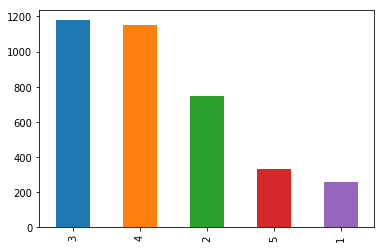

In [10]:
from pandas import Series,DataFrame
rating_count.plot(kind='bar')



### Frequency distribution for Hospital Ownership Type

In [45]:
ownership_count = dfb['HospitalOwnership'].value_counts()
print(ownership_count)

Voluntary non-profit - Private                 1699
Proprietary                                     634
Voluntary non-profit - Other                    360
Government - Hospital District or Authority     332
Voluntary non-profit - Church                   299
Government - Local                              259
Government - State                               43
Physician                                        29
Government - Federal                             16
Tribal                                            4
Name: HospitalOwnership, dtype: int64




### Bar chart showing the number of hospitals for each Hospital Ownership Type

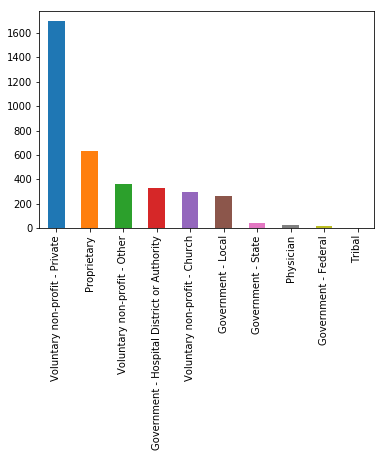

In [46]:
from pandas import Series,DataFrame
ownership_count.plot(kind='bar')



### Number of hospitals for each Hospital Type 
Acute care hospitals: Most inpatient acute hospital stays are short, while patients in long-term acute care hospitals may be fighting more than one condition or have more complicated illnesses. They provide acute care for Medicare patients who need extended or more intensive care. 

Critical access hospitals: Rural hospitals which have 25 or fewer acute care inpatient beds

In [7]:
type_count = dfb['HospitalType'].value_counts()
print(type_count)

Acute Care Hospitals         3025
Critical Access Hospitals     650
Name: HospitalType, dtype: int64




### Crosstab: Hospital Type & Hospital Ownership Type
There are more acute care hospitals and critical access hospitals for all hospital ownership types.

In [40]:
import seaborn as sns
pd.crosstab(dfb.HospitalType, dfb.HospitalOwnership)

HospitalOwnership,Government - Federal,Government - Hospital District or Authority,Government - Local,Government - State,Physician,Proprietary,Tribal,Voluntary non-profit - Church,Voluntary non-profit - Other,Voluntary non-profit - Private
HospitalType,,,,,,,,,,
Acute Care Hospitals,15,245,158,39,29,605,3,259,313,1359
Critical Access Hospitals,1,87,101,4,0,29,1,40,47,340




### Box plot: Hospital Overall Rating & Hospital Type
The boxplot shows that the average rating of Acute Care Hospitals is less than the average rating of Critical Access Hospitals. Ratings of Acute Care Hospitals show much more variation than the ratings of Critical Access Hospitals. 

Text(0, 0.5, 'Hospital Overall Rating')

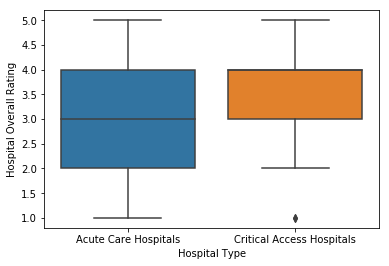

In [42]:
import seaborn as sns
%matplotlib inline
sns.boxplot(x='HospitalType', y='Hospitaloverallrating', data=dfb) 
plt.xlabel("Hospital Type")
plt.ylabel('Hospital Overall Rating')

### Mean Hospital Overall Rating for each Hospital Type

In [49]:
ratings_type = dfb.groupby('HospitalType', as_index=False)['Hospitaloverallrating'].mean()
ratings_type

,HospitalType,Hospitaloverallrating
0,Acute Care Hospitals,3.075372
1,Critical Access Hospitals,3.503077



### Crosstab: Hospital Overall Rating & Hospital Type
The crostab confirms that hospital ratings for acute care hospitals are distributed more evenly whereas the rating distribution of critical access hospitals is more skewed toward higher ratings, comparatively.

In [71]:
import seaborn as sns
pd.crosstab(df.Hospitaloverallrating, df.HospitalType)

HospitalType,Acute Care Hospitals,Critical Access Hospitals
Hospitaloverallrating,,
1,257,2
2,702,48
3,922,256
4,844,309
5,300,35


### Mean Hospital Overall Rating in each State

In [17]:
ratings_state = dfb.groupby('State', as_index=False)['Hospitaloverallrating'].mean()
ratings_state

,State,Hospitaloverallrating
0,AK,3.100000
1,AL,2.975309
2,AR,2.767857
3,AZ,3.105263
4,CA,2.896907
5,CO,3.769231
6,CT,2.892857
7,DC,1.714286
8,DE,3.833333
9,FL,2.464286




### The state with the highest hospital rating mean: South Dakota 

In [18]:

ratings_state[ratings_state['Hospitaloverallrating']==ratings_state['Hospitaloverallrating'].max()]

,State,Hospitaloverallrating
43,SD,4.117647




### The state with the lowest hospital rating mean: Puerto Rico

In [19]:
ratings_state[ratings_state['Hospitaloverallrating']==ratings_state['Hospitaloverallrating'].min()]

,State,Hospitaloverallrating
40,PR,1.666667
